# Accumulated Local Effect

This code is a allows to compute Accumuated Local Effect based on Machine Learning models trained by PyTerK. 

Explaination of ALE are given in this book : https://christophm.github.io/interpretable-ml-book/ale.html

More interpretation of the results are given in Elise Garel PhD report: https://www.researchgate.net/publication/369033835_Metallurgie_combinatoire_des_alliages_metalliques_en_couches_minces_apport_du_Machine_Learning_a_la_recherche_de_nouvelles_compositions_optimales






## Import libraries 

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
import joblib
import os

from sklearn.inspection import plot_partial_dependence,PartialDependenceDisplay
from sklearn.datasets import make_friedman1


from PyALE import ale


## Get data path

In [2]:
datasets_dir=os.getenv("DATASETS_DIR")
run_dir=os.getenv("RUN_DIR")

## Features to take into account for ALE

In [3]:
features=['Zr_at','Nb_at','Mo_at','Ti_at','Cr_at']

dataset_path=f"{datasets_dir}/Database_XRD.csv"
dataset=pd.read_csv(dataset_path, header=0)

classXRD=f"{run_dir}campaign09cNN/Class_XRD/Class_XRD-0000/iter-000/kfold-00/"
with open(classXRD+'/yytest.json') as fd:
    yy = json.load(fd)
    y_pred=np.reshape(np.array(yy['y_pred']),(np.shape(np.array(yy['y_pred']))[0]))
    y_test=np.reshape(np.array(yy['y_test']),(np.shape(np.array(yy['y_test']))[0]))
   
display(dataset)       
loaded_model_class_NN=keras.models.load_model(classXRD+'bestmodel.h5',compile = False)       



Unnamed: 0                      Sample  Zr_at  Nb_at  Mo_at  Ti_at  Cr_at  \
0      compo_1        grad6-CrMo measure 1   0.00   4.08  35.93   4.46  55.52   
1      compo_2        grad6-CrMo measure 2   0.00   4.71  35.14   5.19  54.96   
2      compo_3        grad6-CrMo measure 3   0.00   5.36  34.46   6.17  54.01   
3      compo_4        grad6-CrMo measure 4   0.00   6.14  33.88   7.11  52.86   
4      compo_5        grad6-CrMo measure 5   0.00   7.02  33.36   8.01  51.61   
..         ...                         ...    ...    ...    ...    ...    ...   
453  compo_460   grad25-NbTiZrCr measure 8  10.38  19.72  28.67  15.63  25.59   
454  compo_461   grad25-NbTiZrCr measure 9  10.22  20.31  24.11  14.92  30.44   
455  compo_462  grad25-NbTiZrCr measure 10  10.57  21.21  20.66  16.09  31.48   
456  compo_463  grad25-NbTiZrCr measure 11  11.11  22.05  17.05  17.24  32.56   
457  compo_464  grad25-NbTiZrCr measure 12  11.44  22.97  14.44  17.94  33.21   

      Zr_m   Nb_m   Mo_m   Ti_m   Cr_m  XRD (0: amorphous)  
0     0.00   5.47  49.77   3.08  41.67                   1  
1     0.00   6.32  48.76   3.60  41.32                   1  
2     0.00   7.21  47.86   4.28  40.65                   1  
3     0.00   8.26  47.04   4.93  39.77                   1  
4     0.00   9.43  46.25   5.55  38.78                   1  
..     ...    ...    ...    ...    ...                 ...  
453  12.44  24.08  36.14   9.84  17.49                   1  
454  12.55  25.40  31.13   9.62  21.31                   1  
455  13.16  26.90  27.07  10.52  22.35                   0  
456  14.04  28.38  22.67  11.44  23.46                   0  
457  14.60  29.85  19.38  12.02  24.15                   0  

[458 rows x 13 columns]

## Plot single features ALE

PyALE._ALE_generic:INFO: Continuous feature detected.


19.999786885245904 20.37909850986546
        Zr_at     Nb_at     Mo_at     Ti_at     Cr_at
0   -0.981387 -0.781182  0.781694 -0.762536  1.742973
1   -0.981387 -0.750268  0.742929 -0.726715  1.715494
2   -0.981387 -0.718373  0.709561 -0.678626  1.668877
3   -0.981387 -0.680098  0.681100 -0.632500  1.612447
4   -0.981387 -0.636917  0.655584 -0.588337  1.551109
..        ...       ...       ...       ...       ...
453 -0.472042 -0.013729  0.425446 -0.214425  0.274311
454 -0.479893  0.015222  0.201688 -0.249265  0.512300
455 -0.462719  0.059385  0.032397 -0.191853  0.563333
456 -0.436221  0.100604 -0.144746 -0.135422  0.616328
457 -0.420028  0.145748 -0.272818 -0.101074  0.648224

[458 rows x 5 columns]


/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
PyALE._ALE_generic:INFO: Continuous feature detected.
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/

flag
flag


/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
PyALE._ALE_generic:INFO: Continuous feature detected.
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/

flag
flag


/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


flag


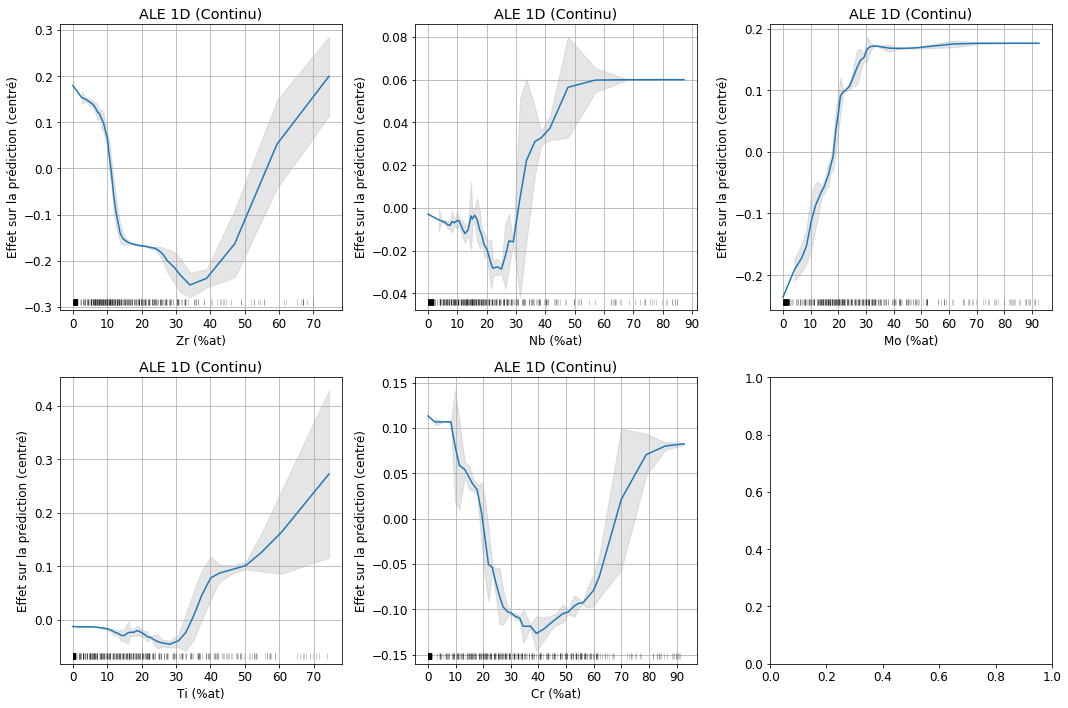

In [6]:
with open(classXRD+'/about.json') as fd:
        about=json.load(fd)
        monitoring=about['monitoring']
        mean=monitoring['mean']
        std=monitoring['std']
        print(mean,std)
X_sample = (dataset[features]-mean)/std
print(X_sample)
fig, [[ax1, ax2, ax3],[ ax4, ax5, ax6]] = plt.subplots(2, 3, figsize=(15, 10) )
i=0
ax_list=[ax1, ax2, ax3, ax4, ax5]

for f in features:
    ax=ax_list[i]
    ale_eff = ale(X=X_sample, model=loaded_model_class_NN, feature=[f], mean=mean, std=std, vmin=-0.2, vmax=0.2,  grid_size=50, include_CI=True, C=0.95, plot=True, fig=fig, ax=ax_list[i])
    
    line=ax.lines[0]
    X=line.get_xdata()

    X_compo=X*std+mean
    X_compo_max=round(max(X_compo/10))*10
    X_compo_range=np.linspace(0,X_compo_max,int(X_compo_max/10)+1)

    X_max=(X_compo_max-mean)/std
    X_range=(X_compo_range-mean)/std
    ax.set_xticks(X_range)
    
    labels= [str(int(ticks)) for ticks in X_compo_range]
    ax.set_xticklabels(labels)

    i+=1
plt.tight_layout()

# change x labels
plt.rcParams.update({'font.size': 12})

ax1.set_xlabel("Zr (%at)")
ax2.set_xlabel("Nb (%at)")
ax3.set_xlabel("Mo (%at)")
ax4.set_xlabel("Ti (%at)")
ax5.set_xlabel("Cr (%at)")

ax1.set_ylabel("Effet sur la prédiction (centré)")
ax2.set_ylabel("Effet sur la prédiction (centré)")
ax3.set_ylabel("Effet sur la prédiction (centré)")
ax4.set_ylabel("Effet sur la prédiction (centré)")
ax5.set_ylabel("Effet sur la prédiction (centré)")
ax1.set_title("ALE 1D (Continu)")
ax2.set_title("ALE 1D (Continu)")
ax3.set_title("ALE 1D (Continu)")
ax4.set_title("ALE 1D (Continu)")
ax5.set_title("ALE 1D (Continu)")

ax1.get_legend().remove()
ax2.get_legend().remove()
ax3.get_legend().remove()
ax4.get_legend().remove()
ax5.get_legend().remove()

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax5.grid()
   
   
#plt.savefig('/Users/elisegarel/Desktop/REDACTION/Figures/ALE/PHASE/ALE1D')
plt.show()


## Plot couples features ALE

Zr_at     Nb_at     Mo_at     Ti_at     Cr_at
0   -0.981387 -0.781182  0.781694 -0.762536  1.742973
1   -0.981387 -0.750268  0.742929 -0.726715  1.715494
2   -0.981387 -0.718373  0.709561 -0.678626  1.668877
3   -0.981387 -0.680098  0.681100 -0.632500  1.612447
4   -0.981387 -0.636917  0.655584 -0.588337  1.551109
..        ...       ...       ...       ...       ...
453 -0.472042 -0.013729  0.425446 -0.214425  0.274311
454 -0.479893  0.015222  0.201688 -0.249265  0.512300
455 -0.462719  0.059385  0.032397 -0.191853  0.563333
456 -0.436221  0.100604 -0.144746 -0.135422  0.616328
457 -0.420028  0.145748 -0.272818 -0.101074  0.648224

[458 rows x 5 columns]

-0.39477200610941926
0.2592928432821604
-0.6250043663208776
0.458976779023176
-1.158506442512952
0.5144068127765783
-0.2633079886581372
1.0410796007462222
-0.1579827492442993
0.1885696231257073
-0.3670795950947648
0.2663750349289553
-0.20186411865968895
0.5318538266567036
-0.28191061722059385
0.23140366890732822
-0.43391638381721465
0.37533087055248615
-0.5235592856178173
1.1667839184788666


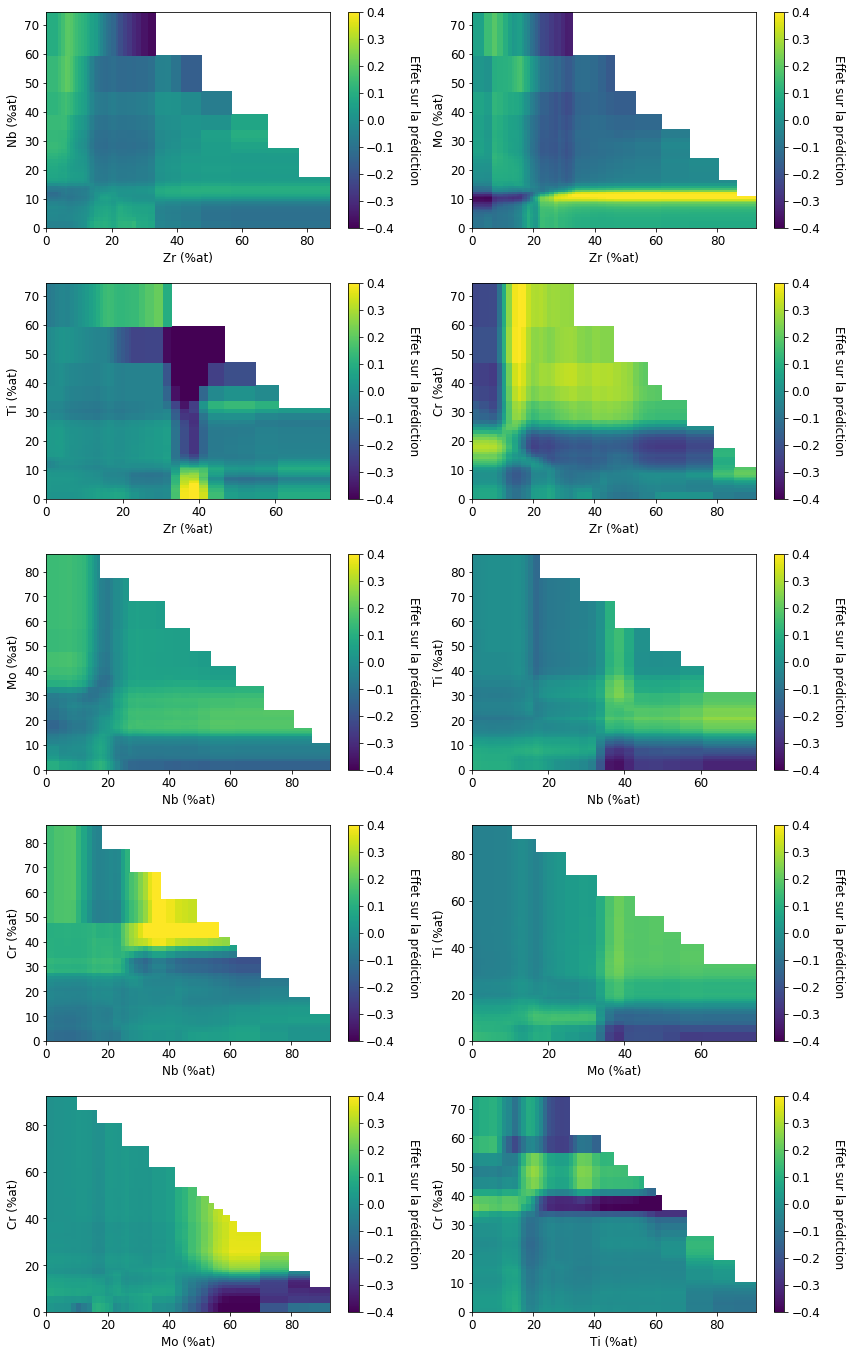

In [8]:
features_couple=[['Zr_at', 'Nb_at'],['Zr_at','Mo_at'],['Zr_at','Ti_at'],['Zr_at', 'Cr_at'], [ 'Nb_at', 'Mo_at'],[ 'Nb_at','Ti_at'],[ 'Nb_at','Cr_at'], ['Mo_at','Ti_at'], ['Mo_at','Cr_at'], ['Ti_at', 'Cr_at']]

fig, [[ax1, ax2],[ ax3, ax4],[ax5, ax6],[ax7, ax8], [ax9, ax10]] = plt.subplots(5,2, figsize=(12, 19) )

i=0
ax_list=[ax1, ax2, ax3, ax4, ax5,ax6, ax7, ax8, ax9, ax10]

xlabel_list=["Zr (%at)","Zr (%at)","Zr (%at)","Zr (%at)","Nb (%at)","Nb (%at)","Nb (%at)","Mo (%at)","Mo (%at)","Ti (%at)"]
ylabel_list=["Nb (%at)","Mo (%at)","Ti (%at)","Cr (%at)","Mo (%at)","Ti (%at)","Cr (%at)","Ti (%at)","Cr (%at)","Cr (%at)"]
X_sample = (dataset[features]-mean)/std
display(X_sample)
for f in features_couple:
    
    ax=ax_list[i]
    #ax.plot(X_sample[f[0]],X_sample[f[1]],'ko', markersize=7)
    ale_eff = ale(X=X_sample, model=loaded_model_class_NN, feature=f, mean=mean, std=std, vmin=-0.4, vmax=0.4, grid_size=50, fig=fig, ax=ax_list[i])
    ax.set_xlabel(xlabel_list[i])
    ax.set_ylabel(ylabel_list[i])
    # change x labels
    plt.rcParams.update({'font.size': 12})
    plt.tight_layout()
 

    
    #im=ax.get_images()[0]
    #print(dir(im))
    #data=im.get_array()
    #print(data.shape)
    #A = np.arange(-0.2, 0.2, 0.05)
    #ax.imshow(data, vmin=-0.2, vmax= 0.2, cmap='viridis')
    
    
    i+=1

plt.savefig('/Users/elisegarel/Desktop/REDACTION/Figures/ALE/PHASE/ALE2D')
plt.show()

TypeError: ale() missing 4 required positional arguments: 'mean', 'std', 'vmin', and 'vmax'

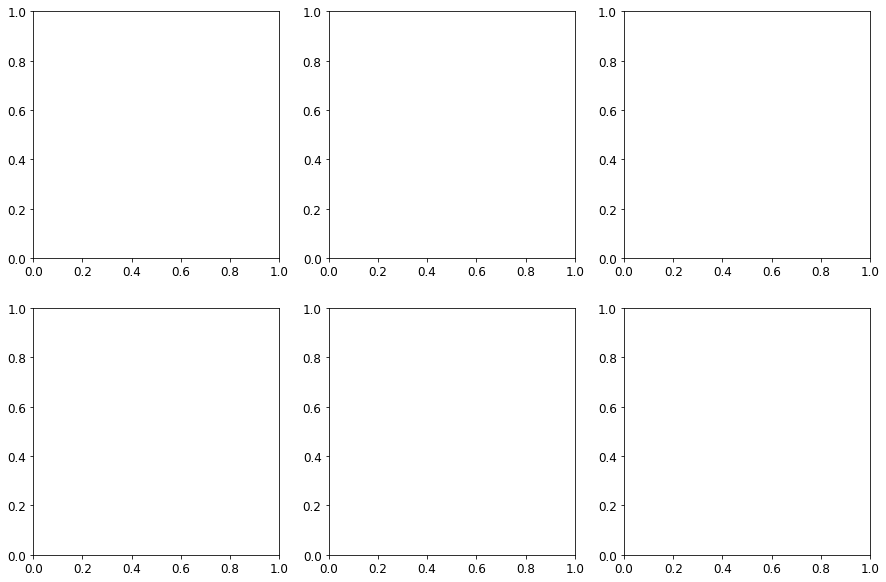

In [10]:
features=['Zr_at','Nb_at','Mo_at','Ti_at','Cr_at']

datasetE=pd.read_csv(f"{datasets_dir}/Compo_E_wo_outlier.csv", header=0)
datasetH=pd.read_csv(f"{datasets_dir}/Compo_H_wo_outlier.csv", header=0)

fitE_NN=f"{run_dir}campaign09r/Fit_E/Fit_E-0007/iter-000/kfold-00/"
fitE_RF=f"{run_dir}campaign09r/Fit_E/Fit_E-0006/iter-000/kfold-00/"

fitH_NN=f"{run_dir}campaign09r/Fit_H/Fit_H-0007/iter-000/kfold-00/"
fitH_RF=f"{run_dir}campaign09r/Fit_H/Fit_H-0006/iter-000/kfold-00/"

   
loaded_model_E_NN=keras.models.load_model(fitE_NN+'bestmodel.h5',compile = False)       
loaded_model_H_NN=keras.models.load_model(fitH_NN+'bestmodel.h5',compile = False)       

loaded_model_E_RF=joblib.load(fitE_RF+'savedmodel.joblib') 
loaded_model_H_RF=joblib.load(fitH_RF+'savedmodel.joblib') 

model_path=[fitE_NN, fitH_NN, fitE_RF, fitH_RF]
loaded_model_list=[loaded_model_E_NN, loaded_model_H_NN, loaded_model_E_RF, loaded_model_H_RF]
save_path=['_E_NN', '_H_NN', '_E_RF', '_H_RF']
dataset=[datasetE,datasetH,datasetE,datasetH]

sp=0
for model in loaded_model_list:
    with open(model_path[sp]+'/about.json') as fd:
        about=json.load(fd)
        monitoring=about['monitoring']
        mean=monitoring['mean']
        std=monitoring['std']

    X_sample = dataset[sp]
    X_sample=(X_sample[features]-mean)/std
    fig, [[ax1, ax2, ax3],[ ax4, ax5, ax6]] = plt.subplots(2, 3, figsize=(15, 10), )
    i=0
    ax_list=[ax1, ax2, ax3, ax4, ax5]

    for f in features:
        ax=ax_list[i] 
        ale_eff = ale(X=X_sample, model=model, feature=[f], grid_size=100, include_CI=True, C=0.95, plot=True, fig=fig, ax=ax_list[i] )
        line=ax.lines[0]
        X=line.get_xdata()

        X_compo=X*std+mean
        X_compo_max=round(max(X_compo/10))*10
        X_compo_range=np.linspace(0,X_compo_max,int(X_compo_max/10)+1)

        X_max=(X_compo_max-mean)/std
        X_range=(X_compo_range-mean)/std
        ax.set_xticks(X_range)
        
        labels= [str(int(ticks)) for ticks in X_compo_range]
        ax.set_xticklabels(labels)

        i+=1
    plt.tight_layout()

    # change x labels
    plt.rcParams.update({'font.size': 12})

    ax1.set_xlabel("Zr (%at)")
    ax2.set_xlabel("Nb (%at)")
    ax3.set_xlabel("Mo (%at)")
    ax4.set_xlabel("Ti (%at)")
    ax5.set_xlabel("Cr (%at)")

    ax1.set_ylabel("Effet sur la prédiction (centré)")
    ax2.set_ylabel("Effet sur la prédiction (centré)")
    ax3.set_ylabel("Effet sur la prédiction (centré)")
    ax4.set_ylabel("Effet sur la prédiction (centré)")
    ax5.set_ylabel("Effet sur la prédiction (centré)")
    ax1.set_title("ALE 1D (Continu)")
    ax2.set_title("ALE 1D (Continu)")
    ax3.set_title("ALE 1D (Continu)")
    ax4.set_title("ALE 1D (Continu)")
    ax5.set_title("ALE 1D (Continu)")
    ax1.get_legend().remove()
    ax2.get_legend().remove()
    ax3.get_legend().remove()
    ax4.get_legend().remove()
    ax5.get_legend().remove()
   
    ax1.grid()
    ax2.grid()
    ax3.grid()
    ax4.grid()
    ax5.grid()
   


    plt.savefig('A:/REDACTION/Figures/ALE/MECA/ALE1D'+save_path[sp])
    plt.show()
    sp+=1

19.9999 20.715588197143628
-32.6301244551143
152.54905931515935
-384.8076493057126
32.59540931722465
-51.28548482396015
38.79776287232124
-55.359321034512604
57.76059920841057
-45.932145489671655
81.20055035668585
-38.39637711997286
28.524373194738217
-15.089388351606653
116.26070907647608
-60.53378412352792
20.478632998235977
-36.81819051506483
80.8256494613858
-45.02050041044745
34.51035940506747


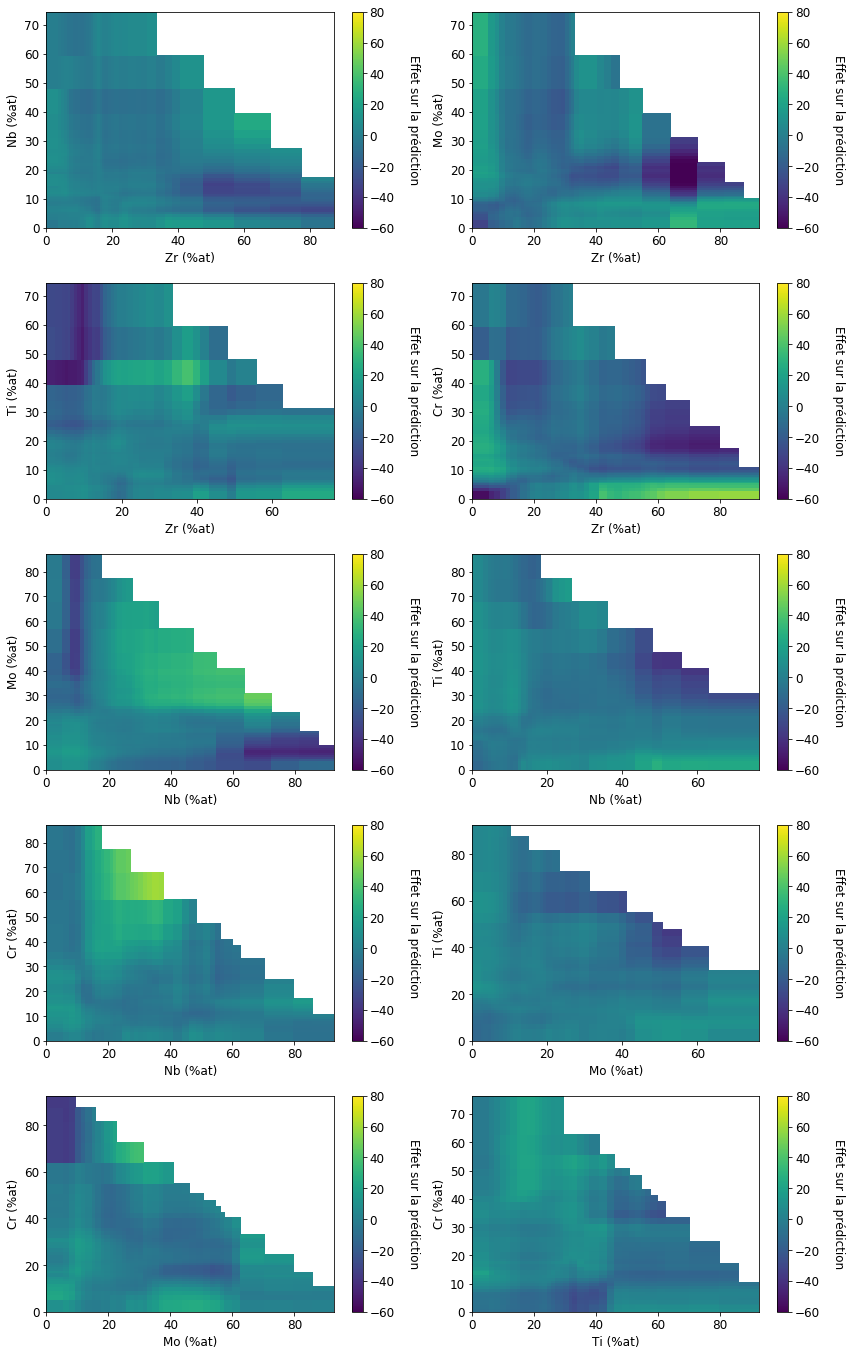

19.999828735632185 20.87128115472632
-1.7215056058937213
15.138808222429759
-5.995978772886341
5.1909483028521795
-6.246139699921721
3.986569175549484
-12.313304129155716
2.830661885088717
-3.3221204632784946
6.712805436481267
-2.261242683956405
4.031567623364961
-1.7053903311678753
6.477027167182416
-3.5220790194436926
2.33898394132597
-3.100961084343115
3.8695373747215975
-2.0377857649817996
2.2484131135326773


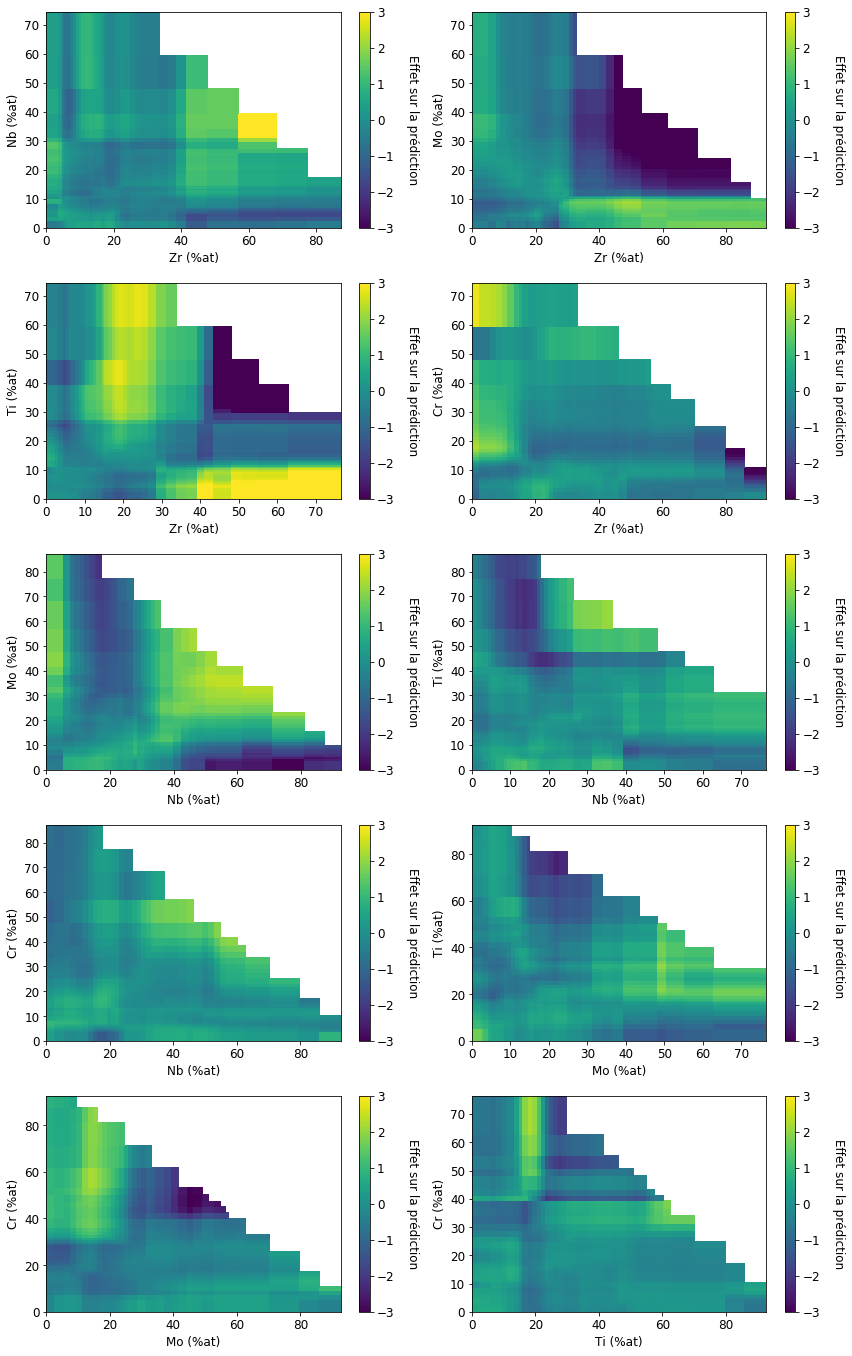

19.999838636363638 20.873372401358147
-18.48252575260313
29.257699782455763
-83.71584012731944
433.5991160585746
-10.802444759939725
49.38228896187082
-130.74548612374198
34.00482377372609
-41.02786978694785
34.45660273133918
-43.61392487131393
16.015936356840143
-13.929181295366671
7.162285583549469
-55.863042295665025
18.719870902101135
-74.48717988728761
49.25145129851771
-109.79427166204442
43.64682932357638


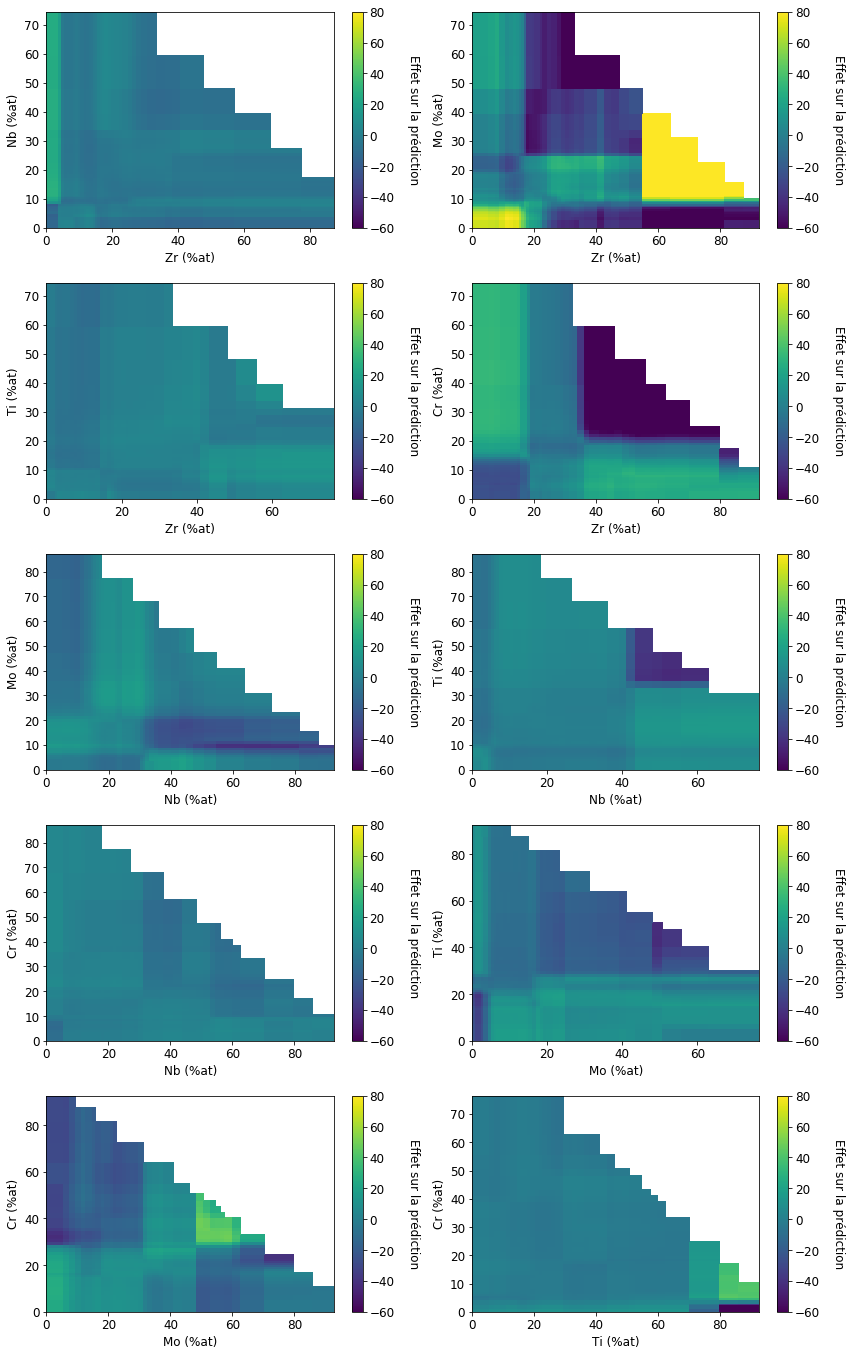

19.99980229885058 20.645941446535872
-3.4068819308985345
4.00747083651568
-1.5943178893139882
7.464360946223638
-2.288392108038096
1.339790847650974
-2.491093947697554
1.0776119389582688
-6.824264958798576
2.1695465132831
-1.7585394194806265
8.066145660598067
-2.022826316595637
1.5610993730587508
-1.2867803525365078
2.1793092217817494
-5.327247199977559
1.8541546147726866
-2.838610480991934
1.1748718725749459


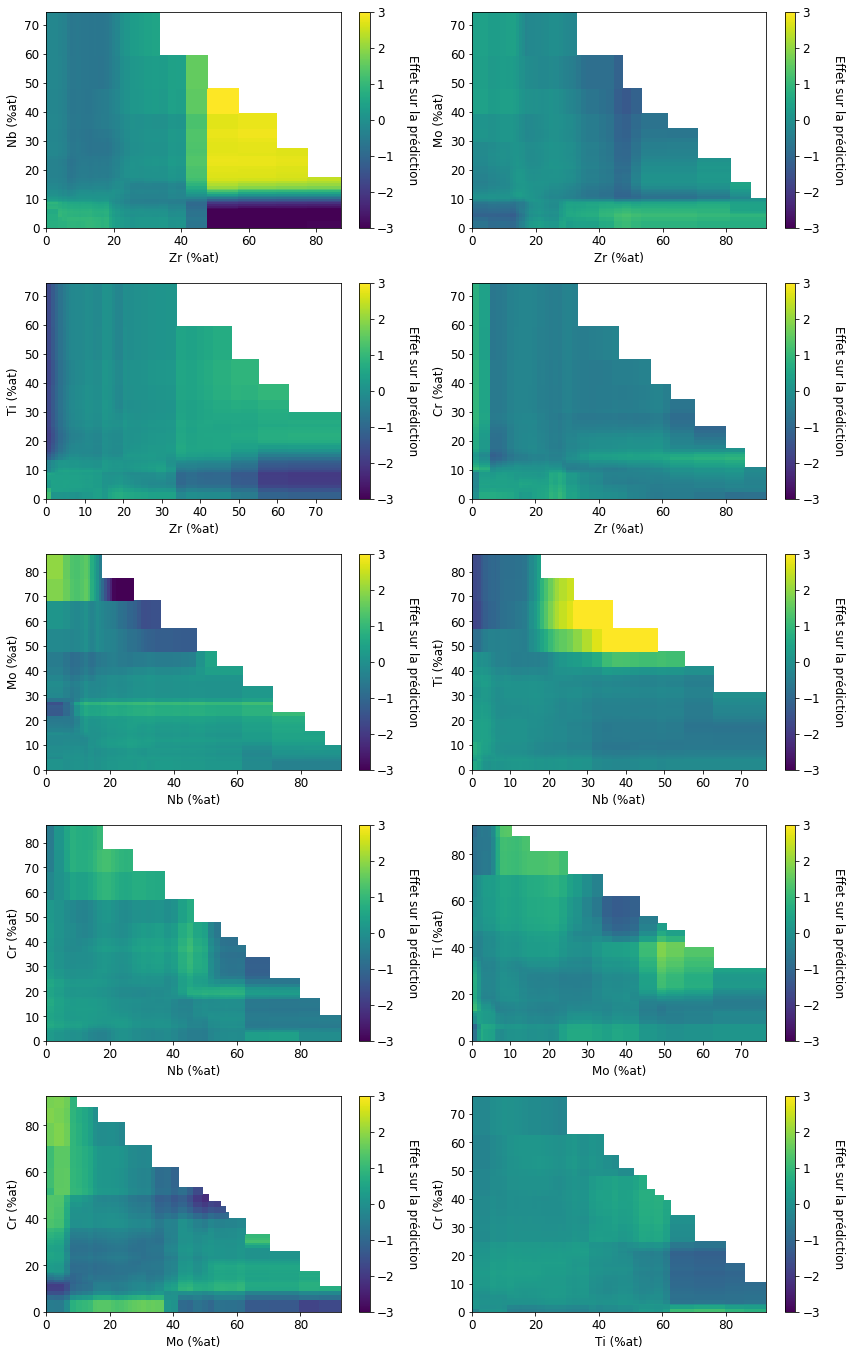

In [17]:
features_couple=[['Zr_at', 'Nb_at'],['Zr_at','Mo_at'],['Zr_at','Ti_at'],['Zr_at', 'Cr_at'], [ 'Nb_at', 'Mo_at'],[ 'Nb_at','Ti_at'],[ 'Nb_at','Cr_at'], ['Mo_at','Ti_at'], ['Mo_at','Cr_at'], ['Ti_at', 'Cr_at']]
min=[-60 , -3,-60, -3]
max=[80,3,80, 3]
sp=0
for model in loaded_model_list:
    with open(model_path[sp]+'/about.json') as fd:
        about=json.load(fd)
        monitoring=about['monitoring']
        mean=monitoring['mean']
        std=monitoring['std']

    print(mean,std)
    fig, [[ax1, ax2],[ ax3, ax4],[ax5, ax6],[ax7, ax8], [ax9, ax10]] = plt.subplots(5,2, figsize=(12, 19) )

    i=0
    ax_list=[ax1, ax2, ax3, ax4, ax5,ax6, ax7, ax8, ax9, ax10]

    X_sample = dataset[sp]
    X_sample=(X_sample[features]-mean)/std
    for f in features_couple:
        ax=ax_list[i]
        #ax.plot(X_sample[f[0]],X_sample[f[1]],'ko', markersize=7)
        ale_eff = ale(X=X_sample, model=model, feature=f, mean=mean, std=std, vmin=min[sp], vmax=max[sp], grid_size=50, fig=fig, ax=ax_list[i])
        ax.set_xlabel(xlabel_list[i])
        ax.set_ylabel(ylabel_list[i])
        # change x labels
        plt.rcParams.update({'font.size': 12})
        plt.tight_layout()
 
        i+=1
   
    plt.savefig('./ALE2D'+save_path[sp])
    plt.show()
    sp+=1